# TensorFlow Keras MNIST dataset

In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [13]:
import tensorflow as tf

tf.__version__

'1.8.0'

In [14]:
mnist = tf.keras.datasets.mnist # 28x28 pixel images of hand-written digits from 0 to 9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.2604 - acc: 0.9242
Epoch 2/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.1052 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.0730 - acc: 0.9768


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 31us/step
0.10012595482999459 0.9669


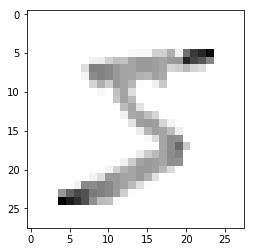

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [21]:
model.save('num_reader.model')

In [22]:
new_model = tf.keras.models.load_model('num_reader.model')

In [23]:
predictions = new_model.predict([x_test])

In [26]:
import numpy as np

print(np.argmax(predictions[5]))

1


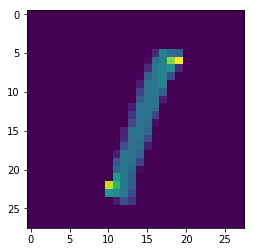

In [27]:
plt.imshow(x_test[5])
plt.show()